## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import statsModel
import scrapbook as sb 
import torch 
import statsModel
import baselineModels
import energyefficiencyDataset
import dataset 
from torch.utils.data import random_split 
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import mean_squared_error,mean_absolute_error 

## Import Dataset 


In [3]:
n_features = 13
n_samples= 506
n_target = 1 
X,Y = energyefficiencyDataset.energy_data()

     X1     X2     X3      X4   X5  X6   X7  X8     Y1     Y2
0  0.98  514.5  294.0  110.25  7.0   2  0.0   0  15.55  21.33
1  0.98  514.5  294.0  110.25  7.0   3  0.0   0  15.55  21.33
2  0.98  514.5  294.0  110.25  7.0   4  0.0   0  15.55  21.33
3  0.98  514.5  294.0  110.25  7.0   5  0.0   0  15.55  21.33
4  0.90  563.5  318.5  122.50  7.0   2  0.0   0  20.84  28.28


In [4]:
# Train test split for dataset 
real_dataset = dataset.CustomDataset(X,Y)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

## Stats Model 



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.914
Model:                            OLS   Adj. R-squared (uncentered):              0.913
Method:                 Least Squares   F-statistic:                              916.4
Date:                Sun, 24 Jul 2022   Prob (F-statistic):                   7.87e-318
Time:                        16:14:11   Log-Likelihood:                         -113.87
No. Observations:                 614   AIC:                                      241.7
Df Residuals:                     607   BIC:                                      272.7
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

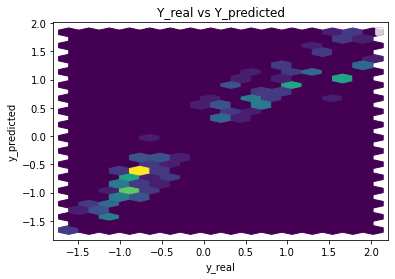

Performance Metrics
Mean Squared Error: 0.08138475649894637
Mean Absolute Error: 0.20411830267561162
Manhattan distance: 31.434218612044187
Euclidean distance: 3.540233396379077


Stats Model MAE 0.20411830267561162


In [5]:
coefficients , y_pred =statsModel.statsModel(X_train,y_train,X_test,y_test)
#Store MSE Value 
sb.glue("Coefficients",coefficients)
mae = mean_absolute_error(y_pred, y_test)
print("Stats Model MAE", mae)

# Catboost Model 

In [6]:
mae_cb = baselineModels.catboost(X_train,y_train,X_test,y_test)
#Store MSE Value
sb.glue("Catboost MAE",mae_cb)
print("Catboost MAE",mae_cb)

Learning rate set to 0.037906


0:	learn: 0.9614819	total: 48.7ms	remaining: 48.7s
1:	learn: 0.9295948	total: 49.2ms	remaining: 24.6s
2:	learn: 0.9025651	total: 49.9ms	remaining: 16.6s
3:	learn: 0.8720908	total: 52.1ms	remaining: 13s
4:	learn: 0.8447109	total: 52.7ms	remaining: 10.5s
5:	learn: 0.8191768	total: 53.1ms	remaining: 8.8s
6:	learn: 0.7920892	total: 53.8ms	remaining: 7.63s
7:	learn: 0.7658596	total: 54.2ms	remaining: 6.72s
8:	learn: 0.7406287	total: 54.9ms	remaining: 6.05s
9:	learn: 0.7180484	total: 55.5ms	remaining: 5.49s
10:	learn: 0.6970967	total: 55.9ms	remaining: 5.03s
11:	learn: 0.6762801	total: 56.5ms	remaining: 4.65s
12:	learn: 0.6570168	total: 57.2ms	remaining: 4.34s
13:	learn: 0.6369564	total: 58.1ms	remaining: 4.09s
14:	learn: 0.6171347	total: 58.8ms	remaining: 3.86s
15:	learn: 0.5970234	total: 59.4ms	remaining: 3.65s
16:	learn: 0.5785983	total: 59.7ms	remaining: 3.45s
17:	learn: 0.5605278	total: 61.2ms	remaining: 3.34s
18:	learn: 0.5444946	total: 61.5ms	remaining: 3.18s
19:	learn: 0.5268965	tota

48:	learn: 0.2423255	total: 82.9ms	remaining: 1.61s
49:	learn: 0.2359237	total: 83.9ms	remaining: 1.59s
50:	learn: 0.2301076	total: 85.1ms	remaining: 1.58s
51:	learn: 0.2253878	total: 85.9ms	remaining: 1.57s
52:	learn: 0.2189950	total: 87.5ms	remaining: 1.56s
53:	learn: 0.2136099	total: 88.6ms	remaining: 1.55s
54:	learn: 0.2078238	total: 89.4ms	remaining: 1.54s
55:	learn: 0.2019812	total: 90.6ms	remaining: 1.53s
56:	learn: 0.1964098	total: 92.7ms	remaining: 1.53s
57:	learn: 0.1916788	total: 93.4ms	remaining: 1.52s
58:	learn: 0.1881943	total: 93.8ms	remaining: 1.5s
59:	learn: 0.1831283	total: 94.6ms	remaining: 1.48s
60:	learn: 0.1789767	total: 95.3ms	remaining: 1.47s
61:	learn: 0.1753616	total: 96.2ms	remaining: 1.45s
62:	learn: 0.1721059	total: 97.1ms	remaining: 1.44s
63:	learn: 0.1683029	total: 98.1ms	remaining: 1.43s
64:	learn: 0.1641604	total: 98.9ms	remaining: 1.42s
65:	learn: 0.1599484	total: 100ms	remaining: 1.42s
66:	learn: 0.1559861	total: 101ms	remaining: 1.41s
67:	learn: 0.15

115:	learn: 0.0690969	total: 152ms	remaining: 1.16s
116:	learn: 0.0683270	total: 152ms	remaining: 1.15s
117:	learn: 0.0672968	total: 153ms	remaining: 1.14s
118:	learn: 0.0666050	total: 153ms	remaining: 1.14s
119:	learn: 0.0656989	total: 154ms	remaining: 1.13s
120:	learn: 0.0649653	total: 155ms	remaining: 1.13s
121:	learn: 0.0642970	total: 156ms	remaining: 1.12s
122:	learn: 0.0636417	total: 157ms	remaining: 1.12s
123:	learn: 0.0630727	total: 158ms	remaining: 1.11s
124:	learn: 0.0626655	total: 159ms	remaining: 1.11s
125:	learn: 0.0622591	total: 160ms	remaining: 1.11s
126:	learn: 0.0616037	total: 160ms	remaining: 1.1s
127:	learn: 0.0612193	total: 161ms	remaining: 1.1s
128:	learn: 0.0608004	total: 162ms	remaining: 1.09s
129:	learn: 0.0601562	total: 162ms	remaining: 1.08s
130:	learn: 0.0596341	total: 163ms	remaining: 1.08s
131:	learn: 0.0592601	total: 163ms	remaining: 1.07s
132:	learn: 0.0588558	total: 163ms	remaining: 1.06s
133:	learn: 0.0583949	total: 165ms	remaining: 1.06s
134:	learn: 0.

157:	learn: 0.0500975	total: 190ms	remaining: 1.01s
158:	learn: 0.0498496	total: 192ms	remaining: 1.02s
159:	learn: 0.0496153	total: 193ms	remaining: 1.01s
160:	learn: 0.0493756	total: 194ms	remaining: 1.01s
161:	learn: 0.0491364	total: 194ms	remaining: 1s
162:	learn: 0.0488981	total: 195ms	remaining: 1s
163:	learn: 0.0486921	total: 196ms	remaining: 999ms
164:	learn: 0.0484973	total: 197ms	remaining: 996ms
165:	learn: 0.0483097	total: 198ms	remaining: 994ms
166:	learn: 0.0481319	total: 198ms	remaining: 990ms
167:	learn: 0.0479388	total: 199ms	remaining: 986ms
168:	learn: 0.0477331	total: 200ms	remaining: 982ms
169:	learn: 0.0475227	total: 201ms	remaining: 980ms
170:	learn: 0.0473647	total: 202ms	remaining: 980ms
171:	learn: 0.0472050	total: 203ms	remaining: 977ms
172:	learn: 0.0471045	total: 204ms	remaining: 974ms
173:	learn: 0.0469448	total: 204ms	remaining: 970ms
174:	learn: 0.0467499	total: 205ms	remaining: 969ms
175:	learn: 0.0465898	total: 206ms	remaining: 966ms
176:	learn: 0.0464

203:	learn: 0.0426065	total: 233ms	remaining: 911ms
204:	learn: 0.0425203	total: 234ms	remaining: 909ms
205:	learn: 0.0423405	total: 235ms	remaining: 907ms
206:	learn: 0.0421869	total: 236ms	remaining: 906ms
207:	learn: 0.0420470	total: 237ms	remaining: 904ms
208:	learn: 0.0418947	total: 238ms	remaining: 902ms
209:	learn: 0.0417624	total: 239ms	remaining: 900ms
210:	learn: 0.0416843	total: 240ms	remaining: 898ms
211:	learn: 0.0414079	total: 241ms	remaining: 896ms
212:	learn: 0.0412630	total: 242ms	remaining: 894ms
213:	learn: 0.0411926	total: 244ms	remaining: 897ms
214:	learn: 0.0411252	total: 246ms	remaining: 898ms
215:	learn: 0.0410401	total: 247ms	remaining: 897ms
216:	learn: 0.0408680	total: 248ms	remaining: 894ms
217:	learn: 0.0407696	total: 248ms	remaining: 891ms
218:	learn: 0.0406771	total: 249ms	remaining: 887ms
219:	learn: 0.0403952	total: 249ms	remaining: 884ms
220:	learn: 0.0403116	total: 250ms	remaining: 880ms
221:	learn: 0.0401754	total: 251ms	remaining: 881ms
222:	learn: 

272:	learn: 0.0345663	total: 313ms	remaining: 833ms
273:	learn: 0.0343969	total: 314ms	remaining: 831ms
274:	learn: 0.0343640	total: 314ms	remaining: 829ms
275:	learn: 0.0343034	total: 315ms	remaining: 825ms
276:	learn: 0.0341717	total: 315ms	remaining: 823ms
277:	learn: 0.0340980	total: 319ms	remaining: 829ms
278:	learn: 0.0340498	total: 320ms	remaining: 828ms
279:	learn: 0.0339570	total: 321ms	remaining: 826ms
280:	learn: 0.0338991	total: 322ms	remaining: 824ms
281:	learn: 0.0337774	total: 323ms	remaining: 822ms
282:	learn: 0.0337059	total: 324ms	remaining: 820ms
283:	learn: 0.0335566	total: 325ms	remaining: 819ms
284:	learn: 0.0334716	total: 326ms	remaining: 817ms
285:	learn: 0.0334328	total: 326ms	remaining: 814ms
286:	learn: 0.0333654	total: 327ms	remaining: 812ms
287:	learn: 0.0333292	total: 328ms	remaining: 812ms
288:	learn: 0.0332664	total: 329ms	remaining: 809ms
289:	learn: 0.0331318	total: 330ms	remaining: 808ms
290:	learn: 0.0330054	total: 331ms	remaining: 807ms
291:	learn: 

304:	learn: 0.0318953	total: 347ms	remaining: 790ms
305:	learn: 0.0318350	total: 349ms	remaining: 792ms
306:	learn: 0.0317233	total: 350ms	remaining: 790ms
307:	learn: 0.0316398	total: 351ms	remaining: 789ms
308:	learn: 0.0315292	total: 352ms	remaining: 787ms
309:	learn: 0.0314549	total: 353ms	remaining: 785ms
310:	learn: 0.0313973	total: 356ms	remaining: 788ms
311:	learn: 0.0313640	total: 357ms	remaining: 788ms
312:	learn: 0.0312975	total: 358ms	remaining: 787ms
313:	learn: 0.0311628	total: 359ms	remaining: 784ms
314:	learn: 0.0311027	total: 360ms	remaining: 782ms
315:	learn: 0.0310624	total: 361ms	remaining: 781ms
316:	learn: 0.0309961	total: 362ms	remaining: 779ms
317:	learn: 0.0309659	total: 362ms	remaining: 777ms
318:	learn: 0.0308652	total: 364ms	remaining: 776ms
319:	learn: 0.0308083	total: 365ms	remaining: 775ms
320:	learn: 0.0307211	total: 366ms	remaining: 774ms
321:	learn: 0.0306843	total: 368ms	remaining: 775ms
322:	learn: 0.0306149	total: 369ms	remaining: 773ms
323:	learn: 

352:	learn: 0.0291347	total: 394ms	remaining: 721ms
353:	learn: 0.0290907	total: 395ms	remaining: 720ms
354:	learn: 0.0290257	total: 396ms	remaining: 719ms
355:	learn: 0.0289892	total: 396ms	remaining: 717ms
356:	learn: 0.0289659	total: 397ms	remaining: 715ms
357:	learn: 0.0288545	total: 398ms	remaining: 714ms
358:	learn: 0.0287784	total: 399ms	remaining: 713ms
359:	learn: 0.0287329	total: 401ms	remaining: 712ms
360:	learn: 0.0286866	total: 401ms	remaining: 710ms
361:	learn: 0.0286309	total: 402ms	remaining: 709ms
362:	learn: 0.0285483	total: 403ms	remaining: 707ms
363:	learn: 0.0284978	total: 405ms	remaining: 707ms
364:	learn: 0.0284696	total: 407ms	remaining: 708ms
365:	learn: 0.0284303	total: 407ms	remaining: 706ms
366:	learn: 0.0283643	total: 408ms	remaining: 703ms
367:	learn: 0.0283100	total: 408ms	remaining: 701ms
368:	learn: 0.0282778	total: 408ms	remaining: 698ms
369:	learn: 0.0282579	total: 408ms	remaining: 696ms
370:	learn: 0.0281940	total: 409ms	remaining: 693ms
371:	learn: 

442:	learn: 0.0251400	total: 473ms	remaining: 595ms
443:	learn: 0.0250639	total: 474ms	remaining: 594ms
444:	learn: 0.0249915	total: 476ms	remaining: 594ms
445:	learn: 0.0249642	total: 477ms	remaining: 593ms
446:	learn: 0.0249231	total: 478ms	remaining: 591ms
447:	learn: 0.0248541	total: 478ms	remaining: 590ms
448:	learn: 0.0248150	total: 479ms	remaining: 588ms
449:	learn: 0.0247877	total: 480ms	remaining: 587ms
450:	learn: 0.0247243	total: 482ms	remaining: 587ms
451:	learn: 0.0246840	total: 483ms	remaining: 585ms
452:	learn: 0.0246670	total: 484ms	remaining: 585ms
453:	learn: 0.0246412	total: 485ms	remaining: 583ms
454:	learn: 0.0245760	total: 485ms	remaining: 581ms
455:	learn: 0.0245556	total: 486ms	remaining: 580ms
456:	learn: 0.0245346	total: 487ms	remaining: 579ms
457:	learn: 0.0245046	total: 488ms	remaining: 577ms
458:	learn: 0.0244928	total: 489ms	remaining: 576ms
459:	learn: 0.0244463	total: 490ms	remaining: 575ms
460:	learn: 0.0244260	total: 491ms	remaining: 574ms
461:	learn: 

476:	learn: 0.0238198	total: 507ms	remaining: 556ms
477:	learn: 0.0237850	total: 508ms	remaining: 555ms
478:	learn: 0.0237510	total: 510ms	remaining: 554ms
479:	learn: 0.0237319	total: 511ms	remaining: 553ms
480:	learn: 0.0236956	total: 512ms	remaining: 552ms
481:	learn: 0.0236637	total: 513ms	remaining: 551ms
482:	learn: 0.0236407	total: 514ms	remaining: 551ms
483:	learn: 0.0236256	total: 516ms	remaining: 550ms
484:	learn: 0.0235879	total: 517ms	remaining: 548ms
485:	learn: 0.0235660	total: 517ms	remaining: 547ms
486:	learn: 0.0235566	total: 518ms	remaining: 546ms
487:	learn: 0.0235360	total: 518ms	remaining: 544ms
488:	learn: 0.0235257	total: 519ms	remaining: 543ms
489:	learn: 0.0235074	total: 520ms	remaining: 541ms
490:	learn: 0.0234448	total: 520ms	remaining: 539ms
491:	learn: 0.0234115	total: 521ms	remaining: 538ms
492:	learn: 0.0233743	total: 523ms	remaining: 538ms
493:	learn: 0.0233349	total: 524ms	remaining: 536ms
494:	learn: 0.0233038	total: 525ms	remaining: 536ms
495:	learn: 

514:	learn: 0.0227608	total: 557ms	remaining: 525ms
515:	learn: 0.0227494	total: 558ms	remaining: 523ms
516:	learn: 0.0227289	total: 559ms	remaining: 523ms
517:	learn: 0.0227100	total: 560ms	remaining: 521ms
518:	learn: 0.0226893	total: 561ms	remaining: 520ms
519:	learn: 0.0226686	total: 562ms	remaining: 519ms
520:	learn: 0.0226135	total: 563ms	remaining: 517ms
521:	learn: 0.0225786	total: 564ms	remaining: 517ms
522:	learn: 0.0225435	total: 565ms	remaining: 516ms
523:	learn: 0.0225269	total: 566ms	remaining: 514ms
524:	learn: 0.0224755	total: 567ms	remaining: 513ms
525:	learn: 0.0224411	total: 568ms	remaining: 512ms
526:	learn: 0.0224113	total: 569ms	remaining: 511ms
527:	learn: 0.0223724	total: 570ms	remaining: 510ms
528:	learn: 0.0223494	total: 571ms	remaining: 508ms
529:	learn: 0.0222974	total: 572ms	remaining: 508ms
530:	learn: 0.0222460	total: 573ms	remaining: 506ms
531:	learn: 0.0221940	total: 574ms	remaining: 505ms
532:	learn: 0.0221681	total: 575ms	remaining: 504ms
533:	learn: 

605:	learn: 0.0204362	total: 630ms	remaining: 410ms
606:	learn: 0.0204105	total: 635ms	remaining: 411ms
607:	learn: 0.0203827	total: 636ms	remaining: 410ms
608:	learn: 0.0203518	total: 637ms	remaining: 409ms
609:	learn: 0.0203299	total: 639ms	remaining: 408ms
610:	learn: 0.0203061	total: 640ms	remaining: 407ms
611:	learn: 0.0202955	total: 641ms	remaining: 406ms
612:	learn: 0.0202592	total: 642ms	remaining: 405ms
613:	learn: 0.0202482	total: 642ms	remaining: 404ms
614:	learn: 0.0202343	total: 643ms	remaining: 403ms
615:	learn: 0.0202254	total: 644ms	remaining: 402ms
616:	learn: 0.0202083	total: 646ms	remaining: 401ms
617:	learn: 0.0201989	total: 647ms	remaining: 400ms
618:	learn: 0.0201681	total: 649ms	remaining: 400ms
619:	learn: 0.0201440	total: 650ms	remaining: 398ms
620:	learn: 0.0201346	total: 651ms	remaining: 397ms
621:	learn: 0.0201287	total: 652ms	remaining: 396ms
622:	learn: 0.0200917	total: 653ms	remaining: 395ms
623:	learn: 0.0200669	total: 654ms	remaining: 394ms
624:	learn: 

634:	learn: 0.0198823	total: 666ms	remaining: 383ms
635:	learn: 0.0198640	total: 667ms	remaining: 382ms
636:	learn: 0.0198578	total: 669ms	remaining: 381ms
637:	learn: 0.0198451	total: 671ms	remaining: 381ms
638:	learn: 0.0198229	total: 673ms	remaining: 380ms
639:	learn: 0.0197998	total: 675ms	remaining: 379ms
640:	learn: 0.0197817	total: 677ms	remaining: 379ms
641:	learn: 0.0197645	total: 679ms	remaining: 378ms
642:	learn: 0.0197256	total: 681ms	remaining: 378ms
643:	learn: 0.0196969	total: 683ms	remaining: 378ms
644:	learn: 0.0196892	total: 686ms	remaining: 377ms
645:	learn: 0.0196833	total: 688ms	remaining: 377ms
646:	learn: 0.0196746	total: 690ms	remaining: 377ms
647:	learn: 0.0196660	total: 694ms	remaining: 377ms
648:	learn: 0.0196509	total: 695ms	remaining: 376ms
649:	learn: 0.0196240	total: 696ms	remaining: 375ms
650:	learn: 0.0195872	total: 698ms	remaining: 374ms
651:	learn: 0.0195660	total: 698ms	remaining: 373ms
652:	learn: 0.0195566	total: 699ms	remaining: 371ms
653:	learn: 

664:	learn: 0.0193300	total: 712ms	remaining: 359ms
665:	learn: 0.0192928	total: 715ms	remaining: 358ms
666:	learn: 0.0192811	total: 715ms	remaining: 357ms
667:	learn: 0.0192581	total: 716ms	remaining: 356ms
668:	learn: 0.0192469	total: 719ms	remaining: 356ms
669:	learn: 0.0192362	total: 720ms	remaining: 354ms
670:	learn: 0.0192192	total: 721ms	remaining: 353ms
671:	learn: 0.0191988	total: 722ms	remaining: 352ms
672:	learn: 0.0191877	total: 722ms	remaining: 351ms
673:	learn: 0.0191683	total: 723ms	remaining: 350ms
674:	learn: 0.0191496	total: 723ms	remaining: 348ms
675:	learn: 0.0191358	total: 724ms	remaining: 347ms
676:	learn: 0.0191197	total: 725ms	remaining: 346ms
677:	learn: 0.0191036	total: 725ms	remaining: 344ms
678:	learn: 0.0190801	total: 726ms	remaining: 343ms
679:	learn: 0.0190580	total: 726ms	remaining: 342ms
680:	learn: 0.0190458	total: 726ms	remaining: 340ms
681:	learn: 0.0190258	total: 727ms	remaining: 339ms
682:	learn: 0.0190064	total: 728ms	remaining: 338ms
683:	learn: 

764:	learn: 0.0175817	total: 783ms	remaining: 241ms
765:	learn: 0.0175627	total: 784ms	remaining: 239ms
766:	learn: 0.0175539	total: 788ms	remaining: 239ms
767:	learn: 0.0175456	total: 789ms	remaining: 238ms
768:	learn: 0.0175294	total: 789ms	remaining: 237ms
769:	learn: 0.0174990	total: 790ms	remaining: 236ms
770:	learn: 0.0174853	total: 791ms	remaining: 235ms
771:	learn: 0.0174754	total: 792ms	remaining: 234ms
772:	learn: 0.0174666	total: 793ms	remaining: 233ms
773:	learn: 0.0174613	total: 794ms	remaining: 232ms
774:	learn: 0.0174232	total: 795ms	remaining: 231ms
775:	learn: 0.0173945	total: 796ms	remaining: 230ms
776:	learn: 0.0173900	total: 799ms	remaining: 229ms
777:	learn: 0.0173700	total: 800ms	remaining: 228ms
778:	learn: 0.0173583	total: 801ms	remaining: 227ms
779:	learn: 0.0173490	total: 802ms	remaining: 226ms
780:	learn: 0.0173313	total: 803ms	remaining: 225ms
781:	learn: 0.0173090	total: 803ms	remaining: 224ms
782:	learn: 0.0172791	total: 804ms	remaining: 223ms
783:	learn: 

802:	learn: 0.0169867	total: 811ms	remaining: 199ms
803:	learn: 0.0169765	total: 812ms	remaining: 198ms
804:	learn: 0.0169666	total: 812ms	remaining: 197ms
805:	learn: 0.0169492	total: 812ms	remaining: 196ms
806:	learn: 0.0169328	total: 814ms	remaining: 195ms
807:	learn: 0.0169218	total: 814ms	remaining: 193ms
808:	learn: 0.0169123	total: 815ms	remaining: 192ms
809:	learn: 0.0168974	total: 816ms	remaining: 191ms
810:	learn: 0.0168864	total: 816ms	remaining: 190ms
811:	learn: 0.0168678	total: 816ms	remaining: 189ms
812:	learn: 0.0168386	total: 817ms	remaining: 188ms
813:	learn: 0.0168161	total: 817ms	remaining: 187ms
814:	learn: 0.0168019	total: 818ms	remaining: 186ms
815:	learn: 0.0167913	total: 818ms	remaining: 184ms
816:	learn: 0.0167762	total: 819ms	remaining: 183ms
817:	learn: 0.0167659	total: 820ms	remaining: 182ms
818:	learn: 0.0167357	total: 820ms	remaining: 181ms
819:	learn: 0.0167303	total: 820ms	remaining: 180ms
820:	learn: 0.0167154	total: 820ms	remaining: 179ms
821:	learn: 

895:	learn: 0.0156995	total: 855ms	remaining: 99.3ms
896:	learn: 0.0156880	total: 856ms	remaining: 98.3ms
897:	learn: 0.0156800	total: 857ms	remaining: 97.3ms
898:	learn: 0.0156728	total: 857ms	remaining: 96.3ms
899:	learn: 0.0156601	total: 857ms	remaining: 95.2ms
900:	learn: 0.0156369	total: 857ms	remaining: 94.2ms
901:	learn: 0.0156238	total: 858ms	remaining: 93.2ms
902:	learn: 0.0156125	total: 858ms	remaining: 92.2ms
903:	learn: 0.0156031	total: 859ms	remaining: 91.2ms
904:	learn: 0.0155972	total: 859ms	remaining: 90.2ms
905:	learn: 0.0155864	total: 859ms	remaining: 89.1ms
906:	learn: 0.0155783	total: 859ms	remaining: 88.1ms
907:	learn: 0.0155711	total: 860ms	remaining: 87.1ms
908:	learn: 0.0155610	total: 860ms	remaining: 86.1ms
909:	learn: 0.0155377	total: 861ms	remaining: 85.1ms
910:	learn: 0.0155305	total: 861ms	remaining: 84.1ms
911:	learn: 0.0155255	total: 862ms	remaining: 83.1ms
912:	learn: 0.0155065	total: 862ms	remaining: 82.1ms
913:	learn: 0.0154938	total: 862ms	remaining: 

Catboost MAE 0.018745769139041094


# TabNet Regressor

In [7]:
n_epochs = 1000
batch_size = 32

Device used : cpu


epoch 0  | loss: 1.06957 | train_mse: 0.89826 | train_mae: 0.71416 |  0:00:01s


epoch 1  | loss: 0.3443  | train_mse: 0.39527 | train_mae: 0.47608 |  0:00:02s


epoch 2  | loss: 0.23811 | train_mse: 0.24011 | train_mae: 0.38239 |  0:00:03s


epoch 3  | loss: 0.21495 | train_mse: 0.15606 | train_mae: 0.30002 |  0:00:03s


epoch 4  | loss: 0.19067 | train_mse: 0.174   | train_mae: 0.32302 |  0:00:04s


epoch 5  | loss: 0.16576 | train_mse: 0.12034 | train_mae: 0.27069 |  0:00:05s


epoch 6  | loss: 0.15331 | train_mse: 0.13773 | train_mae: 0.28939 |  0:00:06s


epoch 7  | loss: 0.15158 | train_mse: 0.11128 | train_mae: 0.24712 |  0:00:06s


epoch 8  | loss: 0.12576 | train_mse: 0.08976 | train_mae: 0.20499 |  0:00:07s


epoch 9  | loss: 0.1292  | train_mse: 0.0592  | train_mae: 0.17977 |  0:00:08s


epoch 10 | loss: 0.14899 | train_mse: 0.08681 | train_mae: 0.21022 |  0:00:09s


epoch 11 | loss: 0.10312 | train_mse: 0.07648 | train_mae: 0.20113 |  0:00:09s


epoch 12 | loss: 0.13273 | train_mse: 0.07486 | train_mae: 0.20775 |  0:00:10s


epoch 13 | loss: 0.11456 | train_mse: 0.07437 | train_mae: 0.18745 |  0:00:11s


epoch 14 | loss: 0.11272 | train_mse: 0.05832 | train_mae: 0.18084 |  0:00:11s


epoch 15 | loss: 0.09074 | train_mse: 0.09026 | train_mae: 0.211   |  0:00:12s


epoch 16 | loss: 0.0997  | train_mse: 0.0626  | train_mae: 0.18639 |  0:00:13s


epoch 17 | loss: 0.11436 | train_mse: 0.06142 | train_mae: 0.1853  |  0:00:13s


epoch 18 | loss: 0.08743 | train_mse: 0.04426 | train_mae: 0.15256 |  0:00:14s


epoch 19 | loss: 0.09883 | train_mse: 0.05811 | train_mae: 0.17287 |  0:00:14s


epoch 20 | loss: 0.0796  | train_mse: 0.05263 | train_mae: 0.16508 |  0:00:15s


epoch 21 | loss: 0.07103 | train_mse: 0.05223 | train_mae: 0.16252 |  0:00:16s


epoch 22 | loss: 0.07134 | train_mse: 0.04864 | train_mae: 0.16802 |  0:00:16s


epoch 23 | loss: 0.0734  | train_mse: 0.05257 | train_mae: 0.17323 |  0:00:17s


epoch 24 | loss: 0.07485 | train_mse: 0.06495 | train_mae: 0.19367 |  0:00:17s


epoch 25 | loss: 0.08125 | train_mse: 0.04961 | train_mae: 0.16559 |  0:00:18s


epoch 26 | loss: 0.08121 | train_mse: 0.04782 | train_mae: 0.16836 |  0:00:19s


epoch 27 | loss: 0.08265 | train_mse: 0.04371 | train_mae: 0.1531  |  0:00:19s


epoch 28 | loss: 0.06942 | train_mse: 0.04011 | train_mae: 0.14496 |  0:00:20s


epoch 29 | loss: 0.08261 | train_mse: 0.0401  | train_mae: 0.14238 |  0:00:21s


epoch 30 | loss: 0.06078 | train_mse: 0.03306 | train_mae: 0.13735 |  0:00:21s


epoch 31 | loss: 0.06054 | train_mse: 0.02813 | train_mae: 0.12383 |  0:00:22s


epoch 32 | loss: 0.0855  | train_mse: 0.03112 | train_mae: 0.13225 |  0:00:24s


epoch 33 | loss: 0.06127 | train_mse: 0.03115 | train_mae: 0.12289 |  0:00:25s


epoch 34 | loss: 0.06617 | train_mse: 0.03152 | train_mae: 0.12627 |  0:00:26s


epoch 35 | loss: 0.07313 | train_mse: 0.03127 | train_mae: 0.14051 |  0:00:27s


epoch 36 | loss: 0.06776 | train_mse: 0.02613 | train_mae: 0.11916 |  0:00:27s


epoch 37 | loss: 0.06535 | train_mse: 0.03252 | train_mae: 0.13391 |  0:00:28s


epoch 38 | loss: 0.07252 | train_mse: 0.03376 | train_mae: 0.13404 |  0:00:29s


epoch 39 | loss: 0.04712 | train_mse: 0.02665 | train_mae: 0.12052 |  0:00:30s


epoch 40 | loss: 0.07169 | train_mse: 0.0286  | train_mae: 0.1222  |  0:00:30s


epoch 41 | loss: 0.07897 | train_mse: 0.03111 | train_mae: 0.13525 |  0:00:31s


epoch 42 | loss: 0.04745 | train_mse: 0.02711 | train_mae: 0.12294 |  0:00:32s


epoch 43 | loss: 0.0669  | train_mse: 0.02171 | train_mae: 0.10963 |  0:00:33s


epoch 44 | loss: 0.04938 | train_mse: 0.03202 | train_mae: 0.14468 |  0:00:33s


epoch 45 | loss: 0.05373 | train_mse: 0.03461 | train_mae: 0.1433  |  0:00:34s


epoch 46 | loss: 0.04544 | train_mse: 0.03045 | train_mae: 0.12242 |  0:00:35s


epoch 47 | loss: 0.05861 | train_mse: 0.02757 | train_mae: 0.11687 |  0:00:37s


epoch 48 | loss: 0.05657 | train_mse: 0.02496 | train_mae: 0.11318 |  0:00:38s


epoch 49 | loss: 0.04808 | train_mse: 0.02495 | train_mae: 0.11484 |  0:00:39s


epoch 50 | loss: 0.0591  | train_mse: 0.03174 | train_mae: 0.14167 |  0:00:41s


epoch 51 | loss: 0.05104 | train_mse: 0.02197 | train_mae: 0.11157 |  0:00:43s


epoch 52 | loss: 0.04346 | train_mse: 0.02111 | train_mae: 0.10891 |  0:00:44s


epoch 53 | loss: 0.06489 | train_mse: 0.02795 | train_mae: 0.11819 |  0:00:45s


epoch 54 | loss: 0.04203 | train_mse: 0.02688 | train_mae: 0.12029 |  0:00:46s


epoch 55 | loss: 0.04163 | train_mse: 0.02109 | train_mae: 0.10657 |  0:00:48s


epoch 56 | loss: 0.04497 | train_mse: 0.01916 | train_mae: 0.10265 |  0:00:49s


epoch 57 | loss: 0.03992 | train_mse: 0.02107 | train_mae: 0.10662 |  0:00:50s


epoch 58 | loss: 0.05886 | train_mse: 0.02235 | train_mae: 0.10494 |  0:00:52s


epoch 59 | loss: 0.05333 | train_mse: 0.02035 | train_mae: 0.09529 |  0:00:52s


epoch 60 | loss: 0.04941 | train_mse: 0.02649 | train_mae: 0.10504 |  0:00:54s


epoch 61 | loss: 0.06415 | train_mse: 0.02413 | train_mae: 0.10397 |  0:00:54s


epoch 62 | loss: 0.05906 | train_mse: 0.02308 | train_mae: 0.11037 |  0:00:55s


epoch 63 | loss: 0.06781 | train_mse: 0.03117 | train_mae: 0.13489 |  0:00:56s


epoch 64 | loss: 0.05659 | train_mse: 0.02818 | train_mae: 0.11451 |  0:00:56s


epoch 65 | loss: 0.04508 | train_mse: 0.0313  | train_mae: 0.12524 |  0:00:57s


epoch 66 | loss: 0.03749 | train_mse: 0.01673 | train_mae: 0.09809 |  0:00:58s


epoch 67 | loss: 0.0445  | train_mse: 0.01937 | train_mae: 0.10324 |  0:00:58s


epoch 68 | loss: 0.05495 | train_mse: 0.01636 | train_mae: 0.09336 |  0:00:59s


epoch 69 | loss: 0.0565  | train_mse: 0.02064 | train_mae: 0.10667 |  0:01:00s


epoch 70 | loss: 0.03548 | train_mse: 0.01714 | train_mae: 0.10464 |  0:01:00s


epoch 71 | loss: 0.03375 | train_mse: 0.0173  | train_mae: 0.09708 |  0:01:01s


epoch 72 | loss: 0.0538  | train_mse: 0.01373 | train_mae: 0.08573 |  0:01:02s


epoch 73 | loss: 0.04702 | train_mse: 0.02183 | train_mae: 0.1107  |  0:01:02s


epoch 74 | loss: 0.03823 | train_mse: 0.02051 | train_mae: 0.10732 |  0:01:03s


epoch 75 | loss: 0.04763 | train_mse: 0.01619 | train_mae: 0.09538 |  0:01:04s


epoch 76 | loss: 0.03763 | train_mse: 0.03454 | train_mae: 0.14579 |  0:01:04s


epoch 77 | loss: 0.05187 | train_mse: 0.02088 | train_mae: 0.10798 |  0:01:05s


epoch 78 | loss: 0.03392 | train_mse: 0.01456 | train_mae: 0.08917 |  0:01:06s


epoch 79 | loss: 0.04295 | train_mse: 0.0118  | train_mae: 0.0781  |  0:01:06s


epoch 80 | loss: 0.04378 | train_mse: 0.01827 | train_mae: 0.10211 |  0:01:07s


epoch 81 | loss: 0.03291 | train_mse: 0.02206 | train_mae: 0.10635 |  0:01:07s


epoch 82 | loss: 0.04392 | train_mse: 0.01465 | train_mae: 0.08692 |  0:01:08s


epoch 83 | loss: 0.03213 | train_mse: 0.01393 | train_mae: 0.08456 |  0:01:08s


epoch 84 | loss: 0.03331 | train_mse: 0.01025 | train_mae: 0.07512 |  0:01:09s


epoch 85 | loss: 0.04338 | train_mse: 0.01068 | train_mae: 0.07951 |  0:01:10s


epoch 86 | loss: 0.04244 | train_mse: 0.01886 | train_mae: 0.10131 |  0:01:10s


epoch 87 | loss: 0.03148 | train_mse: 0.01284 | train_mae: 0.08415 |  0:01:11s


epoch 88 | loss: 0.04795 | train_mse: 0.03757 | train_mae: 0.13481 |  0:01:11s


epoch 89 | loss: 0.05336 | train_mse: 0.02106 | train_mae: 0.10423 |  0:01:12s


epoch 90 | loss: 0.04804 | train_mse: 0.0298  | train_mae: 0.11935 |  0:01:13s


epoch 91 | loss: 0.04573 | train_mse: 0.01354 | train_mae: 0.0884  |  0:01:13s


epoch 92 | loss: 0.02883 | train_mse: 0.03395 | train_mae: 0.1118  |  0:01:14s


epoch 93 | loss: 0.03738 | train_mse: 0.01591 | train_mae: 0.09589 |  0:01:15s


epoch 94 | loss: 0.03729 | train_mse: 0.01428 | train_mae: 0.08931 |  0:01:15s


epoch 95 | loss: 0.04119 | train_mse: 0.01285 | train_mae: 0.08322 |  0:01:16s


epoch 96 | loss: 0.0409  | train_mse: 0.01158 | train_mae: 0.07803 |  0:01:17s


epoch 97 | loss: 0.0294  | train_mse: 0.022   | train_mae: 0.10899 |  0:01:17s


epoch 98 | loss: 0.02577 | train_mse: 0.01383 | train_mae: 0.0899  |  0:01:18s


epoch 99 | loss: 0.04717 | train_mse: 0.01266 | train_mae: 0.08563 |  0:01:19s


epoch 100| loss: 0.02578 | train_mse: 0.01175 | train_mae: 0.08955 |  0:01:20s


epoch 101| loss: 0.03022 | train_mse: 0.00826 | train_mae: 0.07067 |  0:01:22s


epoch 102| loss: 0.03058 | train_mse: 0.0107  | train_mae: 0.07839 |  0:01:23s


epoch 103| loss: 0.02603 | train_mse: 0.00906 | train_mae: 0.0711  |  0:01:23s


epoch 104| loss: 0.02652 | train_mse: 0.01611 | train_mae: 0.0937  |  0:01:24s


epoch 105| loss: 0.0233  | train_mse: 0.01436 | train_mae: 0.09408 |  0:01:25s


epoch 106| loss: 0.0268  | train_mse: 0.00914 | train_mae: 0.07024 |  0:01:26s


epoch 107| loss: 0.03357 | train_mse: 0.01112 | train_mae: 0.07688 |  0:01:26s


epoch 108| loss: 0.03458 | train_mse: 0.01367 | train_mae: 0.08313 |  0:01:27s


epoch 109| loss: 0.04011 | train_mse: 0.01447 | train_mae: 0.08772 |  0:01:28s


epoch 110| loss: 0.03753 | train_mse: 0.01234 | train_mae: 0.09243 |  0:01:28s


epoch 111| loss: 0.03933 | train_mse: 0.00935 | train_mae: 0.07127 |  0:01:29s


epoch 112| loss: 0.03969 | train_mse: 0.01319 | train_mae: 0.0815  |  0:01:30s


epoch 113| loss: 0.03004 | train_mse: 0.01088 | train_mae: 0.08078 |  0:01:32s


epoch 114| loss: 0.02666 | train_mse: 0.0108  | train_mae: 0.07078 |  0:01:33s


epoch 115| loss: 0.03349 | train_mse: 0.01473 | train_mae: 0.08611 |  0:01:34s


epoch 116| loss: 0.02463 | train_mse: 0.00798 | train_mae: 0.06364 |  0:01:35s


epoch 117| loss: 0.02403 | train_mse: 0.01087 | train_mae: 0.07545 |  0:01:36s


epoch 118| loss: 0.02239 | train_mse: 0.01341 | train_mae: 0.07687 |  0:01:36s


epoch 119| loss: 0.03417 | train_mse: 0.00983 | train_mae: 0.07162 |  0:01:37s


epoch 120| loss: 0.03169 | train_mse: 0.0131  | train_mae: 0.08309 |  0:01:38s


epoch 121| loss: 0.04024 | train_mse: 0.00951 | train_mae: 0.07349 |  0:01:39s


epoch 122| loss: 0.02613 | train_mse: 0.00874 | train_mae: 0.07278 |  0:01:41s


epoch 123| loss: 0.01712 | train_mse: 0.00765 | train_mae: 0.06637 |  0:01:43s


epoch 124| loss: 0.02236 | train_mse: 0.00943 | train_mae: 0.07595 |  0:01:45s


epoch 125| loss: 0.0384  | train_mse: 0.0136  | train_mae: 0.08909 |  0:01:47s


epoch 126| loss: 0.0372  | train_mse: 0.01473 | train_mae: 0.08629 |  0:01:48s


epoch 127| loss: 0.02778 | train_mse: 0.0065  | train_mae: 0.06121 |  0:01:50s


epoch 128| loss: 0.03349 | train_mse: 0.00605 | train_mae: 0.05734 |  0:01:52s


epoch 129| loss: 0.02868 | train_mse: 0.0134  | train_mae: 0.09231 |  0:01:53s


epoch 130| loss: 0.02555 | train_mse: 0.00797 | train_mae: 0.06999 |  0:01:54s


epoch 131| loss: 0.03097 | train_mse: 0.01173 | train_mae: 0.07877 |  0:01:55s


epoch 132| loss: 0.02134 | train_mse: 0.01166 | train_mae: 0.08131 |  0:01:55s


epoch 133| loss: 0.023   | train_mse: 0.00574 | train_mae: 0.06045 |  0:01:56s


epoch 134| loss: 0.02576 | train_mse: 0.00717 | train_mae: 0.06668 |  0:01:57s


epoch 135| loss: 0.03363 | train_mse: 0.0141  | train_mae: 0.08676 |  0:01:58s


epoch 136| loss: 0.03536 | train_mse: 0.01059 | train_mae: 0.08236 |  0:01:58s


epoch 137| loss: 0.02725 | train_mse: 0.0089  | train_mae: 0.07306 |  0:01:59s


epoch 138| loss: 0.02745 | train_mse: 0.0089  | train_mae: 0.07158 |  0:02:00s


epoch 139| loss: 0.02605 | train_mse: 0.00785 | train_mae: 0.06745 |  0:02:01s


epoch 140| loss: 0.03633 | train_mse: 0.00802 | train_mae: 0.0665  |  0:02:01s


epoch 141| loss: 0.02983 | train_mse: 0.00667 | train_mae: 0.06258 |  0:02:02s


epoch 142| loss: 0.02875 | train_mse: 0.01071 | train_mae: 0.08163 |  0:02:03s


epoch 143| loss: 0.02524 | train_mse: 0.0097  | train_mae: 0.07422 |  0:02:03s


epoch 144| loss: 0.02448 | train_mse: 0.00675 | train_mae: 0.06714 |  0:02:04s


epoch 145| loss: 0.02092 | train_mse: 0.00723 | train_mae: 0.06994 |  0:02:05s


epoch 146| loss: 0.02871 | train_mse: 0.00536 | train_mae: 0.0552  |  0:02:05s


epoch 147| loss: 0.0194  | train_mse: 0.00904 | train_mae: 0.06833 |  0:02:06s


epoch 148| loss: 0.01878 | train_mse: 0.00825 | train_mae: 0.07139 |  0:02:07s


epoch 149| loss: 0.01483 | train_mse: 0.00692 | train_mae: 0.06691 |  0:02:08s


epoch 150| loss: 0.0574  | train_mse: 0.0124  | train_mae: 0.08606 |  0:02:09s


epoch 151| loss: 0.01866 | train_mse: 0.00981 | train_mae: 0.06698 |  0:02:10s


epoch 152| loss: 0.01643 | train_mse: 0.01037 | train_mae: 0.07668 |  0:02:11s


epoch 153| loss: 0.02528 | train_mse: 0.01173 | train_mae: 0.07861 |  0:02:12s


epoch 154| loss: 0.01926 | train_mse: 0.00689 | train_mae: 0.06421 |  0:02:13s


epoch 155| loss: 0.03194 | train_mse: 0.01419 | train_mae: 0.08682 |  0:02:15s


epoch 156| loss: 0.03594 | train_mse: 0.01036 | train_mae: 0.07482 |  0:02:16s


epoch 157| loss: 0.03403 | train_mse: 0.02594 | train_mae: 0.13011 |  0:02:17s


epoch 158| loss: 0.03927 | train_mse: 0.01081 | train_mae: 0.08507 |  0:02:18s


epoch 159| loss: 0.0293  | train_mse: 0.00932 | train_mae: 0.07252 |  0:02:19s


epoch 160| loss: 0.02784 | train_mse: 0.00752 | train_mae: 0.06629 |  0:02:20s


epoch 161| loss: 0.04583 | train_mse: 0.02077 | train_mae: 0.12206 |  0:02:21s


epoch 162| loss: 0.02559 | train_mse: 0.00791 | train_mae: 0.07545 |  0:02:22s


epoch 163| loss: 0.02458 | train_mse: 0.00787 | train_mae: 0.06745 |  0:02:23s


epoch 164| loss: 0.03017 | train_mse: 0.00961 | train_mae: 0.07489 |  0:02:24s


epoch 165| loss: 0.02089 | train_mse: 0.00992 | train_mae: 0.07737 |  0:02:26s


epoch 166| loss: 0.02947 | train_mse: 0.00948 | train_mae: 0.07673 |  0:02:27s


epoch 167| loss: 0.02431 | train_mse: 0.01403 | train_mae: 0.08875 |  0:02:28s


epoch 168| loss: 0.01906 | train_mse: 0.00582 | train_mae: 0.05661 |  0:02:28s


epoch 169| loss: 0.03105 | train_mse: 0.02338 | train_mae: 0.11848 |  0:02:29s


epoch 170| loss: 0.03377 | train_mse: 0.01434 | train_mae: 0.09546 |  0:02:30s


epoch 171| loss: 0.02983 | train_mse: 0.00802 | train_mae: 0.06747 |  0:02:31s


epoch 172| loss: 0.02989 | train_mse: 0.00999 | train_mae: 0.08343 |  0:02:32s


epoch 173| loss: 0.02115 | train_mse: 0.00874 | train_mae: 0.07469 |  0:02:34s


epoch 174| loss: 0.02461 | train_mse: 0.00673 | train_mae: 0.0645  |  0:02:35s


epoch 175| loss: 0.01258 | train_mse: 0.01022 | train_mae: 0.07824 |  0:02:36s


epoch 176| loss: 0.01916 | train_mse: 0.00558 | train_mae: 0.05703 |  0:02:37s


epoch 177| loss: 0.01863 | train_mse: 0.00485 | train_mae: 0.05554 |  0:02:38s


epoch 178| loss: 0.03905 | train_mse: 0.00839 | train_mae: 0.07278 |  0:02:39s


epoch 179| loss: 0.04169 | train_mse: 0.01439 | train_mae: 0.10188 |  0:02:40s


epoch 180| loss: 0.02206 | train_mse: 0.00724 | train_mae: 0.06122 |  0:02:40s


epoch 181| loss: 0.021   | train_mse: 0.01155 | train_mae: 0.08825 |  0:02:41s


epoch 182| loss: 0.01664 | train_mse: 0.01277 | train_mae: 0.09867 |  0:02:42s


epoch 183| loss: 0.02454 | train_mse: 0.00622 | train_mae: 0.06197 |  0:02:43s


epoch 184| loss: 0.01237 | train_mse: 0.00353 | train_mae: 0.04584 |  0:02:44s


epoch 185| loss: 0.01604 | train_mse: 0.0083  | train_mae: 0.07262 |  0:02:44s


epoch 186| loss: 0.01906 | train_mse: 0.00887 | train_mae: 0.07208 |  0:02:45s


epoch 187| loss: 0.0214  | train_mse: 0.00619 | train_mae: 0.06209 |  0:02:46s


epoch 188| loss: 0.0162  | train_mse: 0.00546 | train_mae: 0.05602 |  0:02:46s


epoch 189| loss: 0.01444 | train_mse: 0.00422 | train_mae: 0.05015 |  0:02:47s


epoch 190| loss: 0.01606 | train_mse: 0.01521 | train_mae: 0.09999 |  0:02:48s


epoch 191| loss: 0.02881 | train_mse: 0.02067 | train_mae: 0.12042 |  0:02:49s


epoch 192| loss: 0.02499 | train_mse: 0.00465 | train_mae: 0.05243 |  0:02:50s


epoch 193| loss: 0.01754 | train_mse: 0.00528 | train_mae: 0.05935 |  0:02:51s


epoch 194| loss: 0.01201 | train_mse: 0.00489 | train_mae: 0.05095 |  0:02:52s


epoch 195| loss: 0.01167 | train_mse: 0.00458 | train_mae: 0.05109 |  0:02:52s


epoch 196| loss: 0.02429 | train_mse: 0.00488 | train_mae: 0.05493 |  0:02:53s


epoch 197| loss: 0.02239 | train_mse: 0.00744 | train_mae: 0.0705  |  0:02:53s


epoch 198| loss: 0.02248 | train_mse: 0.00553 | train_mae: 0.06194 |  0:02:54s


epoch 199| loss: 0.03486 | train_mse: 0.0058  | train_mae: 0.05654 |  0:02:55s


epoch 200| loss: 0.01788 | train_mse: 0.0044  | train_mae: 0.05363 |  0:02:56s


epoch 201| loss: 0.04615 | train_mse: 0.01822 | train_mae: 0.09512 |  0:02:56s


epoch 202| loss: 0.02521 | train_mse: 0.00983 | train_mae: 0.07996 |  0:02:57s


epoch 203| loss: 0.01794 | train_mse: 0.00616 | train_mae: 0.06153 |  0:02:57s


epoch 204| loss: 0.01724 | train_mse: 0.00879 | train_mae: 0.07394 |  0:02:58s


epoch 205| loss: 0.01822 | train_mse: 0.01333 | train_mae: 0.08665 |  0:02:59s


epoch 206| loss: 0.02324 | train_mse: 0.00477 | train_mae: 0.05086 |  0:03:00s


epoch 207| loss: 0.01671 | train_mse: 0.00879 | train_mae: 0.06611 |  0:03:00s


epoch 208| loss: 0.02267 | train_mse: 0.00907 | train_mae: 0.06984 |  0:03:01s


epoch 209| loss: 0.01283 | train_mse: 0.00467 | train_mae: 0.04919 |  0:03:02s


epoch 210| loss: 0.02066 | train_mse: 0.00477 | train_mae: 0.05493 |  0:03:02s


epoch 211| loss: 0.02352 | train_mse: 0.00698 | train_mae: 0.06199 |  0:03:03s


epoch 212| loss: 0.02228 | train_mse: 0.00814 | train_mae: 0.07137 |  0:03:04s


epoch 213| loss: 0.02817 | train_mse: 0.0119  | train_mae: 0.07899 |  0:03:04s


epoch 214| loss: 0.02617 | train_mse: 0.00844 | train_mae: 0.06711 |  0:03:06s


epoch 215| loss: 0.0155  | train_mse: 0.00364 | train_mae: 0.04611 |  0:03:07s


epoch 216| loss: 0.0252  | train_mse: 0.006   | train_mae: 0.05596 |  0:03:07s


epoch 217| loss: 0.01642 | train_mse: 0.00545 | train_mae: 0.05344 |  0:03:08s


epoch 218| loss: 0.02425 | train_mse: 0.00596 | train_mae: 0.05433 |  0:03:09s


epoch 219| loss: 0.0174  | train_mse: 0.00727 | train_mae: 0.06654 |  0:03:10s


epoch 220| loss: 0.013   | train_mse: 0.00378 | train_mae: 0.04871 |  0:03:10s


epoch 221| loss: 0.01623 | train_mse: 0.00493 | train_mae: 0.05256 |  0:03:11s


epoch 222| loss: 0.02421 | train_mse: 0.01195 | train_mae: 0.06837 |  0:03:12s


epoch 223| loss: 0.01918 | train_mse: 0.00791 | train_mae: 0.062   |  0:03:13s


epoch 224| loss: 0.0291  | train_mse: 0.01754 | train_mae: 0.09068 |  0:03:14s


epoch 225| loss: 0.02793 | train_mse: 0.00921 | train_mae: 0.0697  |  0:03:14s


epoch 226| loss: 0.01849 | train_mse: 0.00489 | train_mae: 0.05683 |  0:03:15s


epoch 227| loss: 0.01167 | train_mse: 0.00579 | train_mae: 0.06183 |  0:03:16s


epoch 228| loss: 0.02671 | train_mse: 0.02048 | train_mae: 0.09517 |  0:03:16s


epoch 229| loss: 0.02683 | train_mse: 0.01586 | train_mae: 0.09939 |  0:03:18s


epoch 230| loss: 0.02009 | train_mse: 0.00454 | train_mae: 0.05356 |  0:03:21s


epoch 231| loss: 0.016   | train_mse: 0.00458 | train_mae: 0.05054 |  0:03:23s


epoch 232| loss: 0.01813 | train_mse: 0.005   | train_mae: 0.05238 |  0:03:24s


epoch 233| loss: 0.02035 | train_mse: 0.00683 | train_mae: 0.06278 |  0:03:25s


epoch 234| loss: 0.01228 | train_mse: 0.00593 | train_mae: 0.06184 |  0:03:25s

Early stopping occurred at epoch 234 with best_epoch = 184 and best_train_mae = 0.04584
Best weights from best epoch are automatically used!
BEST VALID SCORE FOR dataset : 0.0458449022893336
FINAL TEST SCORE FOR dataset: 0.04443238997663107
{'loss': [1.069571987134238, 0.34430457326410646, 0.2381074858604891, 0.2149530229816996, 0.19066576239825847, 0.16575929600175118, 0.1533098811047085, 0.15158480206801758, 0.12575630431066506, 0.12919756993408701, 0.14899346790601065, 0.10311784995689455, 0.13273107811371745, 0.11455884964147686, 0.11271721716812456, 0.09073521803566997, 0.09969805926084518, 0.11435868045017851, 0.08743287186086761, 0.09883253426815865, 0.07959767807190116, 0.07102586853193538, 0.07134016057179106, 0.07340302878948299, 0.0748494143206444, 0.08124787940458676, 0.08121210705573861, 0.08264709841642007, 0.06941873902994958, 0.0826097117427506, 0.06077612218134566, 0.06054291106663427, 0.08

TabNet MAE 0.04443238997663107


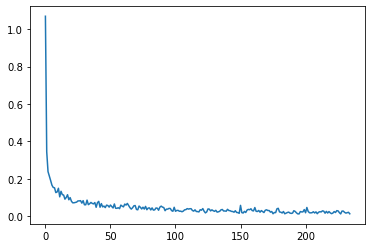

In [8]:
lr = 0.01

y_train = np.reshape(y_train, (-1, 1))
y_test = np.reshape(y_test, (-1, 1))

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
mae_tab= baselineModels.tabnetreg(X_train,y_train,X_test,y_test,batch_size,n_features,n_target,n_epochs, lr)
sb.glue("TabNet MAE",mae_tab)
print("TabNet MAE",mae_tab)